In [1]:
# 导包
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# 569条数据 30个特征 维度不算高，但是样本太少，很容易过拟合
data.data.shape

(569, 30)

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
# 进行一次简单的建模，看看模型本身在数据集上的效果
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
# 参数：实例化的模型、完整的特征矩阵、完整的特征标签、交叉验证的次数、用什么参数作为交叉验证的回馈（可选，不选根据模型自己选）
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10, scoring="accuracy").mean()
score_pre

0.9648809523809524

0.9631265664160402 71


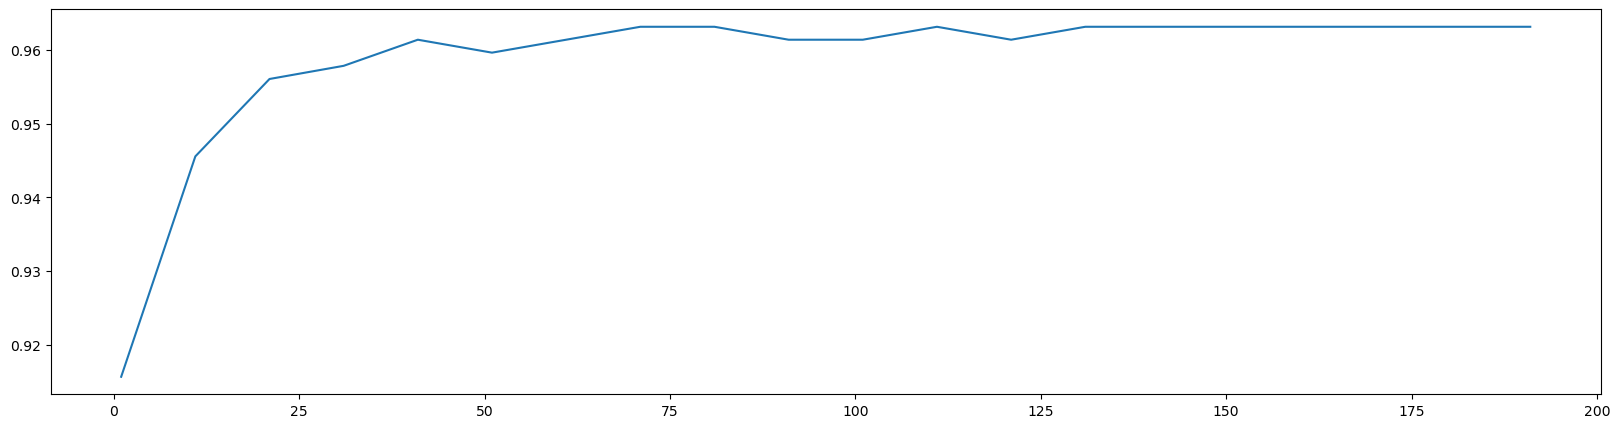

In [6]:
# 随机森林调参第一步，无论如何先调n_estimators
# 在这里我们选择学习曲线，可以使用网格搜索么？可以，但是只有学习曲线，才能看见趋势
# 应该看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
# 第一次的学习曲线，应该先用来帮助我们划定范围，我们取每十个数作为第一阶段，来观察n_estimators的变化如何 引起模型整体准确率的变化

scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                 ,n_jobs=-1
                                 ,random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    scorel.append(score)
# 最大值和最大值的索引
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9666353383458647 73


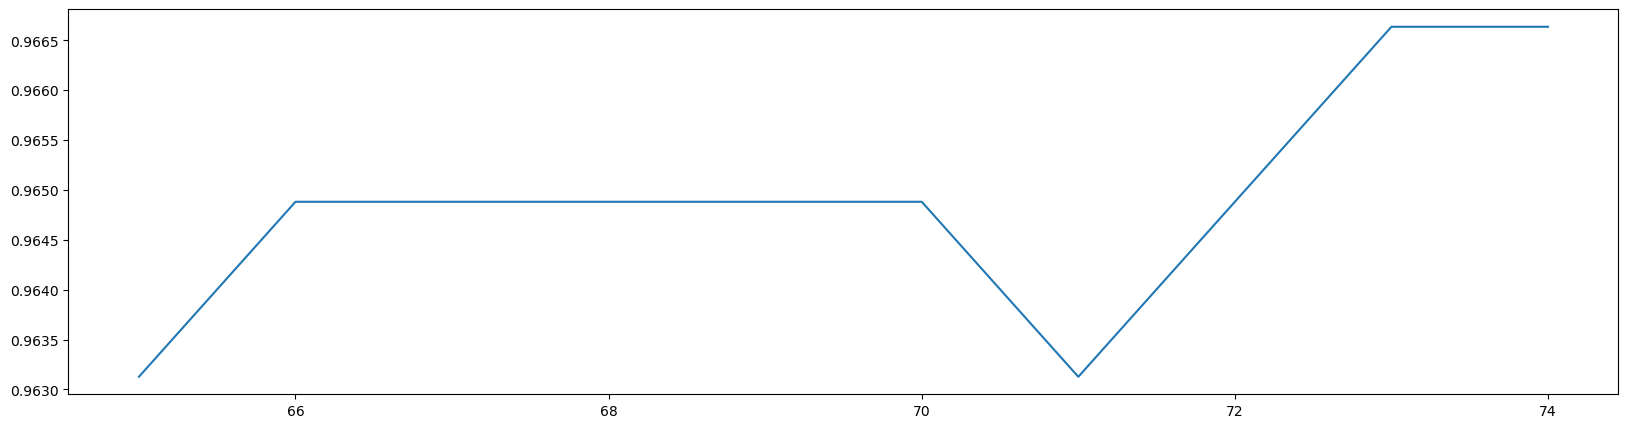

In [10]:
# 这里只能看出来70左右是有一个峰值的
# 在确定好的范围内，进一步细化学习曲线
scorel = []
for i in range(65, 75):
    rfc = RandomForestClassifier(n_estimators=i
                                 ,n_jobs=-1
                                 ,random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    scorel.append(score)
# 最大值和最大值的索引
print(max(scorel), ([*range(65,75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75),scorel)
plt.show()

In [11]:
# 可以看出调整n_estimators的效果娴熟，接下来就是进入网格搜索
# 我们将使用网格搜索对参数一个一个进行调整
# 不同时调整多个参数的原因如下：1）同时调整多个运行速度慢 2）不知道组合参数的意义

In [13]:
# 首先调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GS.best_params_ # 8层是最好的

{'max_depth': 8}

In [14]:
GS.best_score_ # 对应的准确率

0.9666353383458647

In [18]:
# 这里已经能看到模型的准确率已经没有什么提升了，就要考虑max_features了，其他不是增加泛化度就是剪枝的属性
param_grid = {'max_features':np.arange(5,30,1)}
rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90)
GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GS.best_params_

{'max_features': 24}

In [19]:
GS.best_score_

0.9666666666666668

In [25]:
#调整min_samples_leaf

param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'min_samples_leaf': 1}

In [26]:
GS.best_score_

0.9666353383458647

In [27]:
#调整min_samples_split

param_grid={'min_samples_split':np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'min_samples_split': 2}

In [28]:
GS.best_score_

0.9666353383458647

In [29]:
#调整Criterion

param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'criterion': 'gini'}

In [30]:
GS.best_score_

0.9666353383458647

In [32]:
# 调整完毕，总结出模型的最佳参数
rfc = RandomForestClassifier(n_estimators=73,random_state=90,max_features=24)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9666666666666668

In [33]:
score - score_pre # 提升的幅度

0.0017857142857143904